
### I. Introduction:

A superior quality of water is crucial to the health and social well- being of the people.
Water analysis,based on social vulnerability index, helps to identify regions and groups of vulnerable people that tend to receive inadequate water in terms of quality and quantity supplied.
In this notebook, we'll analyze water quality based on the social vulnerability index. Our datasets at hand contains underprivileged groups of people, water distribution, and the quality of water based on Gerogia geographical region. We get some insights into the water vulnerability index by
   * Identifying the counties that are most vulnerable in terms of Scocio-economic Status
   * Identifying the group of people that tend to receive contanminated water and
   * Visualizing the effects of water contamination over the past 5 years.

###### Terminologies
*  SVI  - Social Vulnerability Index. 
What is svi? SVI uses US. Census data to help local officials identify communities that may need support during natural disasters. SVI is categorical into four themes based on   
     * Socioeconomic status (below poverty, unemployed, income, no high school diploma)
     * Household composition & disability (aged 65 or older, aged 17 or younger, older than age 5 with a disability, single-parent households)
     * Minority status & language (minority, speak English “less than well”)
     * Housing type & transportation (multi-unit structures, mobile homes, crowding, no vehicle, group quarters)

###### Calculation Method:
* Rankings:
     * Percentile Rank = (Rank-1)/(N-1) 
          * N = total number of data point
          * Percentile ranking values range from 0-1
          * Higher percentile ranking indicates greater vulnerability
  
* References:                            
https://svi.cdc.gov/A%20Social%20Vulnerability%20Index%20for%20Disaster%20Management.pdf#:%7E:text=A%20Social%20Vulnerability%20Index%20for%20Disaster%20Management%201,loss%20estimates%20for%20buildings%20and%20infrastructure”%20%28FEMA%202009a%29
   
https://atlantaregional.org/atlanta-region/about-the-atlanta-region

#####  I. SVI Georgia County Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Load the svi dataset
svi = gpd.read_file('GEORGIA_COUNTY.shp')
svi.head(2)

ST    STATE ST_ABBR   COUNTY   FIPS                 LOCATION   AREA_SQMI  \
0  13  GEORGIA      GA  Appling  13001  Appling County, Georgia  507.123611   
1  13  GEORGIA      GA    Bacon  13005    Bacon County, Georgia  284.036195   

   E_TOTPOP  M_TOTPOP    E_HU  ...  F_NOVEH  F_GROUPQ  F_THEME4  F_TOTAL  \
0   18410.0       0.0  8408.0  ...      0.0       0.0       0.0      0.0   
1   11251.0       0.0  4743.0  ...      0.0       0.0       0.0      0.0   

   E_UNINSUR  M_UNINSUR  EP_UNINSUR  MP_UNINSUR  E_DAYPOP  \
0     3319.0      372.0        18.5         2.1   17595.0   
1     1743.0      268.0        16.4         2.5   10832.0   

                                            geometry  
0  POLYGON ((-82.55069 31.74911, -82.54744 31.749...  
1  POLYGON ((-82.62818 31.56593, -82.62734 31.672...  

[2 rows x 124 columns]

In [3]:
# Check for general info
print(svi.info())
print(svi.shape)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 159 entries, 0 to 158
Columns: 124 entries, ST to geometry
dtypes: float64(117), geometry(1), object(6)
memory usage: 154.2+ KB
None
(159, 124)


In [4]:
# Create a dictionary view using dictionary comprehension
# This dictionary help to easily navigate through the columns and double check the names or renames if needed
col_mapping_dict1= {c[0]:c[1] for c in enumerate(svi.columns)}
print(col_mapping_dict1)

{0: 'ST', 1: 'STATE', 2: 'ST_ABBR', 3: 'COUNTY', 4: 'FIPS', 5: 'LOCATION', 6: 'AREA_SQMI', 7: 'E_TOTPOP', 8: 'M_TOTPOP', 9: 'E_HU', 10: 'M_HU', 11: 'E_HH', 12: 'M_HH', 13: 'E_POV', 14: 'M_POV', 15: 'E_UNEMP', 16: 'M_UNEMP', 17: 'E_PCI', 18: 'M_PCI', 19: 'E_NOHSDP', 20: 'M_NOHSDP', 21: 'E_AGE65', 22: 'M_AGE65', 23: 'E_AGE17', 24: 'M_AGE17', 25: 'E_DISABL', 26: 'M_DISABL', 27: 'E_SNGPNT', 28: 'M_SNGPNT', 29: 'E_MINRTY', 30: 'M_MINRTY', 31: 'E_LIMENG', 32: 'M_LIMENG', 33: 'E_MUNIT', 34: 'M_MUNIT', 35: 'E_MOBILE', 36: 'M_MOBILE', 37: 'E_CROWD', 38: 'M_CROWD', 39: 'E_NOVEH', 40: 'M_NOVEH', 41: 'E_GROUPQ', 42: 'M_GROUPQ', 43: 'EP_POV', 44: 'MP_POV', 45: 'EP_UNEMP', 46: 'MP_UNEMP', 47: 'EP_PCI', 48: 'MP_PCI', 49: 'EP_NOHSDP', 50: 'MP_NOHSDP', 51: 'EP_AGE65', 52: 'MP_AGE65', 53: 'EP_AGE17', 54: 'MP_AGE17', 55: 'EP_DISABL', 56: 'MP_DISABL', 57: 'EP_SNGPNT', 58: 'MP_SNGPNT', 59: 'EP_MINRTY', 60: 'MP_MINRTY', 61: 'EP_LIMENG', 62: 'MP_LIMENG', 63: 'EP_MUNIT', 64: 'MP_MUNIT', 65: 'EP_MOBILE', 66: '

In [5]:
# check for missing values
svi.isnull().any().sum()

0

In [6]:
# Quick look at the counties to see what counties present in the dataset
d = [i for i in svi['COUNTY'].value_counts().index]
print(d)

['Miller', 'Towns', 'Floyd', 'Worth', 'Dawson', 'Douglas', 'Montgomery', 'Stewart', 'Sumter', 'Twiggs', 'Lanier', 'Baker', 'Echols', 'Lamar', 'Glascock', 'Grady', 'Newton', 'Dougherty', 'Lincoln', 'Seminole', 'Effingham', 'Walker', 'Harris', 'Banks', 'Hall', 'Gwinnett', 'Ware', 'Webster', 'Thomas', 'Carroll', 'Henry', 'Hart', 'Chatham', 'Rockdale', 'Clay', 'DeKalb', 'Warren', 'Dade', 'Peach', 'Cook', 'Appling', 'Glynn', 'Calhoun', 'Colquitt', 'Franklin', 'Crawford', 'Brooks', 'Gilmer', 'Clayton', 'Cherokee', 'Brantley', 'Murray', 'Muscogee', 'Fulton', 'Pulaski', 'Bartow', 'Screven', 'Evans', 'Quitman', 'Telfair', 'Marion', 'Bryan', 'Richmond', 'Coffee', 'Oglethorpe', 'Burke', 'Dodge', 'Jefferson', 'Washington', 'Barrow', 'Chattooga', 'Ben Hill', 'Clarke', 'Pickens', 'Tift', 'Treutlen', 'Emanuel', 'Atkinson', 'Bleckley', 'Toombs', 'Walton', 'Oconee', 'Jasper', 'Union', 'Fannin', 'Jenkins', 'Wilkes', 'Lowndes', 'Mitchell', 'Schley', 'Paulding', 'Wilkinson', 'Hancock', 'Houston', 'Madison

In [7]:
# Atlanta region is made up by 11 counties: (Atlanta belongs to Fulton County)
# 'Fulton','Fayette','Clayton','DeKalb','Gwinnett','Forsyth','Cherokee','Cobb', 'Douglas', 'Henry','Rockdale'
# Subset atlanta regions from the svi dataframe
Atl_Reg = ['Cherokee', 'Clayton','Cobb','DeKalb', 'Douglas','Fayette','Henry','Forsyth','Fulton',
          'Gwinnett','Rockdale' ]
atl_reg_svi = svi[svi['COUNTY'].isin(Atl_Reg)]
atl_reg_svi.head(2)

ST    STATE ST_ABBR    COUNTY   FIPS                  LOCATION  \
8   13  GEORGIA      GA  Cherokee  13057  Cherokee County, Georgia   
19  13  GEORGIA      GA   Fayette  13113   Fayette County, Georgia   

     AREA_SQMI  E_TOTPOP  M_TOTPOP     E_HU  ...  F_NOVEH  F_GROUPQ  F_THEME4  \
8   421.109584  230629.0       0.0  85926.0  ...      0.0       0.0       0.0   
19  194.363402  109495.0       0.0  41391.0  ...      0.0       0.0       0.0   

    F_TOTAL  E_UNINSUR  M_UNINSUR  EP_UNINSUR  MP_UNINSUR  E_DAYPOP  \
8       0.0    30609.0     1749.0        13.3         0.8  178484.0   
19      0.0     8419.0     1023.0         7.7         0.9   99027.0   

                                             geometry  
8   POLYGON ((-84.65883 34.09571, -84.65853 34.109...  
19  POLYGON ((-84.62722 33.44008, -84.62572 33.443...  

[2 rows x 124 columns]

In [8]:
# Create a heatmap to check for correlation between variables in the dataset
cr = atl_reg_svi.corr(method='pearson')
import plotly.graph_objects as go
fig = go.Figure(go.Heatmap(x=cr.columns,y=cr.columns,z=cr.values.tolist(),
                           colorscale='rdylgn', zmin=-1, zmax=1))
fig.update_layout(title={'text':'Social Vulnerability Indexes Correlation',
                        'y':0.9,'x': 0.5,'xanchor':'center','yanchor':'top'})
fig.show()

##### Key takeaways
* The scale bar ranks from -1 to 1, with 1(darkgreen)is the strongest postive relationship and -1 (darkred) is the most negative relationship
* White color indicates no data is available
* There're some strong correlation between no high school diploma and minority status,poverty and minority, no high school diploma and the number of household unit, strong negative relationship between the age of 65 with per capita income, etc...

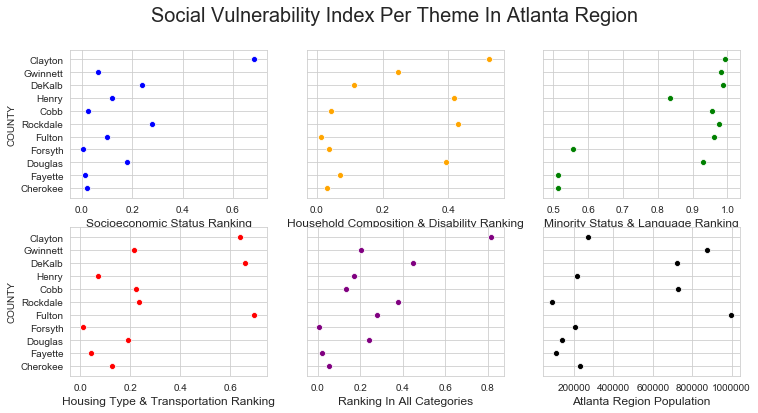

In [9]:
# Let's plot SVI per theme per county
# Add another plot of county vs. population at the end for comparation between SVI rankings and Population
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharey=True)
fig.suptitle('Social Vulnerability Index Per Theme In Atlanta Region', fontsize=20)
# first graph on first row, first column
sns.scatterplot(ax=axes[0, 0], data= atl_reg_svi, y='COUNTY', x='RPL_THEME1', color = 'blue')
axes[0,0].set_xlabel('Socioeconomic Status Ranking', fontsize=12)
# second grpha on first row, second column
sns.scatterplot(ax=axes[0, 1], data = atl_reg_svi, y= 'COUNTY', x='RPL_THEME2',color='orange')
axes[0,1].set_xlabel('Household Composition & Disability Ranking',fontsize=12)
# third graph on first row, third column
sns.scatterplot(ax=axes[0, 2], data=atl_reg_svi, y='COUNTY', x='RPL_THEME3', color='green')
axes[0,2].set_xlabel('Minority Status & Language Ranking',fontsize=12)
# four graph second row, first column
sns.scatterplot(ax=axes[1, 0], data=atl_reg_svi, y='COUNTY', x='RPL_THEME4', color='red')
axes[1,0].set_xlabel('Housing Type & Transportation Ranking',fontsize=12)
# fifth graph second row, second column
sns.scatterplot(ax=axes[1, 1], data=atl_reg_svi, y='COUNTY', x='RPL_THEMES', color='purple')
axes[1,1].set_xlabel('Ranking In All Categories',fontsize=12)
# sixth graph, second row, third column
sns.scatterplot(ax=axes[1, 2], data=atl_reg_svi, y='COUNTY', x='E_TOTPOP', color='black')
axes[1,2].set_xlabel('Atlanta Region Population',fontsize=12)
plt.show()

##### Key takeaways 
* Vulnerability index ranking from 0 -1, with 1 is the most vulnerable and 0 is the least vulnerable
* Clayton ran high all four categories even though its population isn't that high indicate population isn't correlation with socioeconomic status

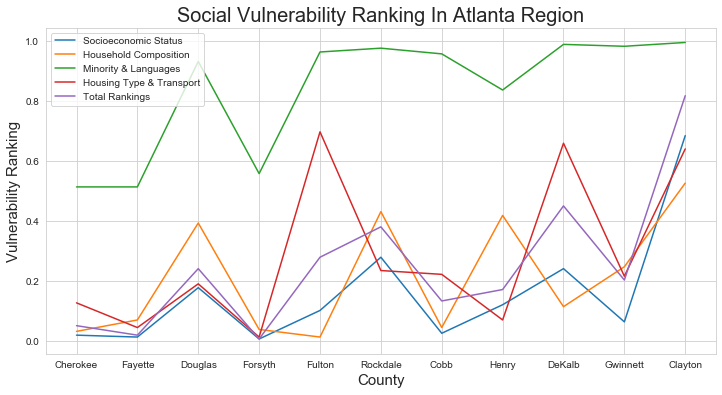

In [10]:
# Plot SVI for Atlanta Region
rank = ['RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4','RPL_THEMES']
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(atl_reg_svi.COUNTY,atl_reg_svi[rank])
plt.xlabel('County', fontsize=15)
plt.ylabel('Vulnerability Ranking', fontsize=15)
plt.title('Social Vulnerability Ranking In Atlanta Region', fontsize=20)
# Rename legend for comprehensive purpose
plt.legend(['Socioeconomic Status', 'Household Composition', 'Minority & Languages', 'Housing Type & Transport', 'Total Rankings'])
plt.show()

##### Key takeaways
* Clayton is the county that has the highest vulnerability index on THREE THEMES and FINAL RANKING THEMEM
* Surprisingly Fulton - County that houses Atlanta City - is the most vulnerable county in term of HOUSING TYPE & TRANSPORTATION
* Clayton, Gwinnett, and DeKalb have highest vulnerability index in term of MINORITY and LANGUAGES, Fulton, Rockdale, and Cobb slightly trail behind. Minority groups are likely to reside in counties with big cities 
* Douglas, Rockdale, and Henry are the second - after Clayton in term of HOUSEHOLD COMPOSITION and DISABILITY, althought the index ~ 0.4
* Rockdale also sits second - after Clayton - in term of POVERTY and SCOCIAL ECONOMICAL STATUS
* DeKalb County is the SECOND highest vulnerability index in ALL THEMES

##### II. Water consumption dataset
##### Terms we should know in water consumption dataset
 * Water withdrawn: is the total volume removed from a water source such as a lake or river. Often, a portion of this water is returned to the source and is available to be used again.
 *  Water consumption:  is the amount of water removed for use and not returned to its source.
 *  Water and energy should be managed on an integrated basis. And, unlike issues such as climate change that require global solutions, water must be addressed regionally and locally.

In [11]:
# Exploring water consumption dataset
water = pd.read_excel('Georgia Water Use Data_All Years and Counties.xlsx')
water.head(2)
# 282 features !!!

State Name  County Code     County Name  Year  \
0    Georgia            1  Appling County  1985   
1    Georgia            1  Appling County  1990   

   Total Population total population of area, in thousands  \
0                                              16.30         
1                                              15.74         

   Public Supply population served by groundwater, in thousands  \
0                                               6.56              
1                                               6.00              

   Public Supply population served by surface water, in thousands  \
0                                                0.0                
1                                                0.0                

   Public Supply total population served, in thousands  \
0                                               6.56     
1                                               6.00     

   Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d  \
0                                               0.89                       
1                                               0.51                       

  Public Supply self-supplied groundwater withdrawals, saline, in Mgal/d  ...  \
0                                                  -                      ...   
1                                                  -                      ...   

  Hydroelectric Power power generated by instream use, in gigawatt-hours  \
0                                                  0                       
1                                                  0                       

   Hydroelectric Power power generated by offstream use, in gigawatt-hours  \
0                                                  -                         
1                                                  -                         

  Hydroelectric Power total power generated, in gigawatt-hours  \
0                                                  -             
1                                                  -             

  Hydroelectric Power number of instream facilities  \
0                                                 -   
1                                                 0   

   Hydroelectric Power number of offstream facilities  \
0                                                  -    
1                                                  -    

  Hydroelectric Power total number of facilities  \
0                                              -   
1                                              -   

  Wastewater Treatment returns by public wastewater facilities, in Mgal/d  \
0                                               0.93                        
1                                               0.94                        

  Wastewater Treatment number of public wastewater facilities  \
0                                                  1            
1                                                  1            

  Wastewater Treatment number of wastewater facilities  \
0                                                  -     
1                                                  -     

  Wastewater Treatment reclaimed wastewater released by wastewater facilities, in Mgal/d  
0                                                  -                                      
1                                                  -                                      

[2 rows x 282 columns]

In [12]:
print(water.info())
print(water.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Columns: 282 entries, State Name to Wastewater Treatment reclaimed wastewater released by wastewater facilities, in Mgal/d
dtypes: float64(29), int64(8), object(245)
memory usage: 2.4+ MB
None
(1113, 282)


##### Dealing with missing values '-'

In [13]:
# Check for missing values
water.isna().any().sum()

0

In [14]:
# let's take a look into the 10th columns and see what it has
water['Public Supply self-supplied groundwater withdrawals, saline, in Mgal/d'].value_counts()
# Almost half of the values are missing denoted by '_'
# The other half have values of 0
# We can certainly drop this column
# but let's replace '_' with nan value, and see how the data turn out

0    636
-    477
Name: Public Supply self-supplied groundwater withdrawals, saline, in Mgal/d, dtype: int64

In [15]:
water = pd.read_excel('Georgia Water Use Data_All Years and Counties.xlsx',na_values='-')
water.head()

State Name  County Code     County Name  Year  \
0    Georgia            1  Appling County  1985   
1    Georgia            1  Appling County  1990   
2    Georgia            1  Appling County  1995   
3    Georgia            1  Appling County  2000   
4    Georgia            1  Appling County  2005   

   Total Population total population of area, in thousands  \
0                                             16.300         
1                                             15.740         
2                                             16.360         
3                                             17.419         
4                                             17.954         

   Public Supply population served by groundwater, in thousands  \
0                                              6.560              
1                                              6.000              
2                                              6.600              
3                                              6.464              
4                                              6.660              

   Public Supply population served by surface water, in thousands  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   Public Supply total population served, in thousands  \
0                                              6.560     
1                                              6.000     
2                                              6.600     
3                                              6.464     
4                                              6.660     

   Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d  \
0                                               0.89                       
1                                               0.51                       
2                                               0.87                       
3                                               1.05                       
4                                               0.93                       

   Public Supply self-supplied groundwater withdrawals, saline, in Mgal/d  \
0                                                NaN                        
1                                                NaN                        
2                                                0.0                        
3                                                NaN                        
4                                                0.0                        

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   Hydroelectric Power power generated by instream use, in gigawatt-hours  \
0                                                0.0                        
1                                                0.0                        
2                                                0.0                        
3                                                NaN                        
4                                                NaN                        

   Hydroelectric Power power generated by offstream use, in gigawatt-hours  \
0                                                NaN                         
1                                                NaN                         
2                                                0.0                         
3                                                NaN                         
4                                                NaN                         

   Hydroelectric Power total power generated, in gigawatt-hours  \
0                                                NaN              
1                                                NaN              
2                                        

In [16]:
# Check the previous column again 
water['Public Supply self-supplied groundwater withdrawals, saline, in Mgal/d'].value_counts()

0.0    636
Name: Public Supply self-supplied groundwater withdrawals, saline, in Mgal/d, dtype: int64

In [17]:
# let's take a quick glance of the features in this dataset
cols_mapping= {c[0]:c[1] for c in enumerate(water.columns)}
print(cols_mapping)

{0: 'State Name', 1: 'County Code', 2: 'County Name', 3: 'Year', 4: 'Total Population total population of area, in thousands', 5: 'Public Supply population served by groundwater, in thousands', 6: 'Public Supply population served by surface water, in thousands', 7: 'Public Supply total population served, in thousands', 8: 'Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d', 9: 'Public Supply self-supplied groundwater withdrawals, saline, in Mgal/d', 10: 'Public Supply total self-supplied withdrawals, groundwater, in Mgal/d', 11: 'Public Supply self-supplied surface-water withdrawals, fresh, in Mgal/d', 12: 'Public Supply self-supplied surface-water withdrawals, saline, in Mgal/d', 13: 'Public Supply total self-supplied withdrawals, surface water, in Mgal/d', 14: 'Public Supply total self-supplied withdrawals, fresh, in Mgal/d', 15: 'Public Supply total self-supplied withdrawals, saline, in Mgal/d', 16: 'Public Supply total self-supplied withdrawals, total, in Mgal/d

In [18]:
# Let's drop the 'county' string values in 'County Name' columns
# for example: Cherokee County  will be Cherokee, Gwinnett County = Gwinnett, etc...
water['County Name'] = water['County Name'].str.replace('County','').str.strip()
# Review the results
water['County Name'].value_counts().index
# we're successfully removing 'County' in 'Appling County'

Index(['Miller', 'Tift', 'Elbert', 'Fayette', 'Montgomery', 'Stewart',
       'Sumter', 'Liberty', 'Towns', 'Baker',
       ...
       'Candler', 'Barrow', 'Crisp', 'Burke', 'Stephens', 'Irwin', 'Webster',
       'Early', 'McDuffie', 'Bulloch'],
      dtype='object', length=159)

In [19]:
# Create a new dataframe that has its counties in Atlanta Regional Area by subsetting it from the water dataframe
counties = ['Cherokee','Fayette','Douglas','Forsyth','Fulton',
           'Rockdale','Cobb','Henry','DeKalb','Gwinnett','Clayton']
atl_reg_water = water[water['County Name'].isin(counties)]
atl_reg_water.head()

State Name  County Code County Name  Year  \
189    Georgia           57    Cherokee  1985   
190    Georgia           57    Cherokee  1990   
191    Georgia           57    Cherokee  1995   
192    Georgia           57    Cherokee  2000   
193    Georgia           57    Cherokee  2005   

     Total Population total population of area, in thousands  \
189                                             68.600         
190                                             90.200         
191                                            114.750         
192                                            141.903         
193                                            184.211         

     Public Supply population served by groundwater, in thousands  \
189                                              3.170              
190                                              3.180              
191                                              3.640              
192                                              3.674              
193                                              3.800              

     Public Supply population served by surface water, in thousands  \
189                                             16.900                
190                                             75.000                
191                                             95.630                
192                                            110.264                
193                                            111.520                

     Public Supply total population served, in thousands  \
189                                             20.070     
190                                             78.180     
191                                             99.270     
192                                            113.938     
193                                            115.320     

     Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d  \
189                                               0.24                       
190                                               0.25                       
191                                               0.32                       
192                                               0.33                       
193                                               0.30                       

     Public Supply self-supplied groundwater withdrawals, saline, in Mgal/d  \
189                                                NaN                        
190                                                NaN                        
191                                                0.0                        
192                                                NaN                        
193                                                0.0                        

     ...  \
189  ...   
190  ...   
191  ...   
192  ...   
193  ...   

     Hydroelectric Power power generated by instream use, in gigawatt-hours  \
189                                                0.0                        
190                                                0.0                        
191                                                0.0                        
192                                                NaN                        
193                                                NaN                        

     Hydroelectric Power power generated by offstream use, in gigawatt-hours  \
189                                                NaN                         
190                                                NaN                         
191                                                0.0                         
192                                                NaN                         
193                                                NaN                         

     Hydroelectric Power total power generated, in gigawatt-hours  \
189                                                NaN              
190       

In [20]:
# filter data by consumptive use by Atlanta Regional Counties
atl_reg_water.filter(like='total consumptive use').head(10)

Domestic total consumptive use, in Mgal/d  \
189                                        NaN   
190                                        NaN   
191                                       1.88   
192                                        NaN   
193                                        NaN   
194                                        NaN   
195                                        NaN   
210                                        NaN   
211                                        NaN   
212                                       2.63   

     Commercial total consumptive use, in Mgal/d  \
189                                          NaN   
190                                          NaN   
191                                         0.11   
192                                          NaN   
193                                          NaN   
194                                          NaN   
195                                          NaN   
210                                          NaN   
211                                          NaN   
212                                         0.79   

     Industrial total consumptive use, in Mgal/d  \
189                                         0.07   
190                                         0.07   
191                                         0.11   
192                                          NaN   
193                                          NaN   
194                                          NaN   
195                                          NaN   
210                                         0.11   
211                                         0.11   
212                                         0.23   

     Total Thermoelectric Power total consumptive use, in Mgal/d  \
189                                                0.0             
190                                                0.0             
191                                                0.0             
192                                                NaN             
193                                                NaN             
194                                                NaN             
195                                                0.0             
210                                                0.0             
211                                                0.0             
212                                                0.0             

     Fossil-fuel Thermoelectric Power total consumptive use, in Mgal/d  \
189                                                0.0                   
190                                                0.0                   
191                                                0.0                   
192                                                NaN                   
193                                                NaN                   
194                                                NaN                   
195                                                NaN                   
210                                                0.0                   
211                                                0.0                   
212                                                0.0                   

     Geothermal Thermoelectric Power total consumptive use, in Mgal/d  \
189                                                0.0                  
190                                                0.0                  
191                                                0.0                  
192                                                NaN                  
193                                                NaN                  
194                                                NaN                  
195                                                NaN                  
210                                                0.0                  
211                                                0.0                  
212           

In [21]:
# Since 'fossil fuel, geothermal, nuclear thermoelectric, and thermoelectric power both in 
# via cooling or closed up' columns have no values,dropping them is a wise choice.
atl_reg_use = atl_reg_water[['County Name',
                              'Year',
                              'Total Population total population of area, in thousands',
                              'Domestic total consumptive use, in Mgal/d',
                              'Commercial total consumptive use, in Mgal/d',
                              'Industrial total consumptive use, in Mgal/d',
                              'Total Thermoelectric Power total consumptive use, in Mgal/d',
                              'Mining total consumptive use, in Mgal/d',
                              'Livestock (Animal Specialties) total consumptive use, in Mgal/d',
                              'Aquaculture total consumptive use, in Mgal/d',
                              'Irrigation, Total total consumptive use, in Mgal/d']]
atl_reg_use.head(2)

County Name  Year  \
189    Cherokee  1985   
190    Cherokee  1990   

     Total Population total population of area, in thousands  \
189                                               68.6         
190                                               90.2         

     Domestic total consumptive use, in Mgal/d  \
189                                        NaN   
190                                        NaN   

     Commercial total consumptive use, in Mgal/d  \
189                                          NaN   
190                                          NaN   

     Industrial total consumptive use, in Mgal/d  \
189                                         0.07   
190                                         0.07   

     Total Thermoelectric Power total consumptive use, in Mgal/d  \
189                                                0.0             
190                                                0.0             

     Mining total consumptive use, in Mgal/d  \
189                                      0.0   
190                                      0.0   

     Livestock (Animal Specialties) total consumptive use, in Mgal/d  \
189                                                NaN                 
190                                                NaN                 

     Aquaculture total consumptive use, in Mgal/d  \
189                                           NaN   
190                                           NaN   

     Irrigation, Total total consumptive use, in Mgal/d  
189                                                NaN   
190                                                NaN

In [22]:
# Rename columns
atl_reg_use = atl_reg_use.rename(columns={'County Name':'County',
                                                   'Total Population total population of area, in thousands': 'Total_pop',
                                                   'Domestic total consumptive use, in Mgal/d': 'Domestic',
                                                   'Commercial total consumptive use, in Mgal/d': 'Commercial',
                                                   'Industrial total consumptive use, in Mgal/d': 'Industrial',
                                                   'Total Thermoelectric Power total consumptive use, in Mgal/d': 'Power',
                                                   'Mining total consumptive use, in Mgal/d': 'Mining',
                                                   'Livestock (Animal Specialties) total consumptive use, in Mgal/d': 'Livestock',
                                                   'Aquaculture total consumptive use, in Mgal/d': 'Aquaculture',
                                                   'Irrigation, Total total consumptive use, in Mgal/d': 'Irrigation'})
# and transpose the output to avoid cutting off rows and to have a clear view of data
atl_reg_use.head(26).transpose()

189       190       191       192       193       194  \
County       Cherokee  Cherokee  Cherokee  Cherokee  Cherokee  Cherokee   
Year             1985      1990      1995      2000      2005      2010   
Total_pop        68.6      90.2    114.75   141.903   184.211   214.346   
Domestic          NaN       NaN      1.88       NaN       NaN       NaN   
Commercial        NaN       NaN      0.11       NaN       NaN       NaN   
Industrial       0.07      0.07      0.11       NaN       NaN       NaN   
Power               0         0         0       NaN       NaN       NaN   
Mining              0         0         0       NaN       NaN       NaN   
Livestock         NaN       NaN      0.03       NaN       NaN       NaN   
Aquaculture       NaN       NaN       NaN       NaN       NaN       NaN   
Irrigation        NaN       NaN      0.03       NaN       NaN       NaN   

                  195      210      211      212  ...     226      227  \
County       Cherokee  Clayton  Clayton  Clayton  ...    Cobb     Cobb   
Year             2015     1985     1990     1995  ...    1995     2000   
Total_pop       235.9      167   182.05   198.55  ...  525.45  607.751   
Domestic          NaN      NaN      NaN     2.63  ...   11.09      NaN   
Commercial        NaN      NaN      NaN     0.79  ...     0.7      NaN   
Industrial        NaN     0.11     0.11     0.23  ...    0.43      NaN   
Power               0        0        0        0  ...       0      NaN   
Mining            NaN        0        0        0  ...       0      NaN   
Livestock         NaN      NaN      NaN     0.02  ...    0.03      NaN   
Aquaculture       NaN      NaN      NaN      NaN  ...     NaN      NaN   
Irrigation       1.77      NaN      NaN     0.55  ...    1.84      NaN   

                 228      229      230     301     302     303      304  \
County          Cobb     Cobb     Cobb  DeKalb  DeKalb  DeKalb   DeKalb   
Year            2005     2010     2015    1985    1990    1995     2000   
Total_pop    663.818  688.078  741.334   516.3  545.84   582.1  665.865   
Domestic         NaN      NaN      NaN     NaN     NaN    9.02      NaN   
Commercial       NaN      NaN      NaN     NaN     NaN    0.77      NaN   
Industrial       NaN      NaN      NaN    0.05    0.06     1.5      NaN   
Power            NaN      NaN      7.1       0       0       0      NaN   
Mining           NaN      NaN      NaN       0       0       0      NaN   
Livestock        NaN      NaN      NaN     NaN     NaN    0.04      NaN   
Aquaculture      NaN      NaN      NaN     NaN     NaN     NaN      NaN   
Irrigation       NaN      NaN     1.37     NaN     NaN    1.97      NaN   

                 305  
County        DeKalb  
Year            2005  
Total_pop    677.959  
Domestic         NaN  
Commercial       NaN  
Industrial       NaN  
Power            NaN  
Mining           NaN  
Livestock        NaN  
Aquaculture      NaN  
Irrigation       NaN  

[11 rows x 26 columns]

###### Note:
At a first glance at two counties, Cherokee and Clayton, water consumptions data are missing, We don't have any data since 1995!!!??? Let's move on to another sections of this dataset

In [23]:
# filter data by water public supply for Atlanta Regional Area
atl_reg_water.filter(like='Public Supply').head(5)
# Selectively choose some columns with data and ignore the others without info

Public Supply population served by groundwater, in thousands  \
189                                              3.170              
190                                              3.180              
191                                              3.640              
192                                              3.674              
193                                              3.800              

     Public Supply population served by surface water, in thousands  \
189                                             16.900                
190                                             75.000                
191                                             95.630                
192                                            110.264                
193                                            111.520                

     Public Supply total population served, in thousands  \
189                                             20.070     
190                                             78.180     
191                                             99.270     
192                                            113.938     
193                                            115.320     

     Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d  \
189                                               0.24                       
190                                               0.25                       
191                                               0.32                       
192                                               0.33                       
193                                               0.30                       

     Public Supply self-supplied groundwater withdrawals, saline, in Mgal/d  \
189                                                NaN                        
190                                                NaN                        
191                                                0.0                        
192                                                NaN                        
193                                                0.0                        

     Public Supply total self-supplied withdrawals, groundwater, in Mgal/d  \
189                                                NaN                       
190                                                NaN                       
191                                               0.32                       
192                                                NaN                       
193                                               0.30                       

     Public Supply self-supplied surface-water withdrawals, fresh, in Mgal/d  \
189                                               2.52                         
190                                               5.58                         
191                                              11.38                         
192                                              14.92                         
193                                              18.64                         

     Public Supply self-supplied surface-water withdrawals, saline, in Mgal/d  \
189                                                NaN                          
190                                                NaN                          
191                                                0.0                          
192                                                NaN                          
193                                                0.0                          

     Public Supply total self-supplied withdrawals, surface water, in Mgal/d  \
189                                                NaN                         
190                                                NaN                         
191                                              11.38                         
192                                                NaN                         
193                  

In [24]:
# Subset the Domestic columns in terms of total, and view the first 10 rows
atl_reg_water.filter(like='Domestic total').head(5)

Domestic total self-supplied withdrawals, groundwater, in Mgal/d  \
189                                                NaN                  
190                                                NaN                  
191                                               1.16                  
192                                                NaN                  
193                                                NaN                  

     Domestic total self-supplied withdrawals, surface water, in Mgal/d  \
189                                                NaN                    
190                                                NaN                    
191                                                0.0                    
192                                                NaN                    
193                                                NaN                    

     Domestic total self-supplied withdrawals, fresh, in Mgal/d  \
189                                               3.64            
190                                               0.90            
191                                               1.16            
192                                               2.10            
193                                               5.17            

     Domestic total self-supplied withdrawals, saline, in Mgal/d  \
189                                                NaN             
190                                                NaN             
191                                                0.0             
192                                                NaN             
193                                                NaN             

     Domestic total self-supplied withdrawals, in Mgal/d  \
189                                                NaN     
190                                                NaN     
191                                               1.16     
192                                                NaN     
193                                                NaN     

     Domestic total self-supplied withdrawals plus deliveries, in Mgal/d  \
189                                               8.77                     
190                                               6.31                     
191                                              10.43                     
192                                                NaN                     
193                                              18.90                     

     Domestic total consumptive use, in Mgal/d  
189                                        NaN  
190                                        NaN  
191                                       1.88  
192                                        NaN  
193                                        NaN

In [25]:
# subset and create new dataframe from info that we earlier filtered in
domestic_pub = atl_reg_water[['County Name', 'Year','Public Supply total population served, in thousands',
                                'Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d',
                                'Public Supply self-supplied surface-water withdrawals, fresh, in Mgal/d',
                                 'Public Supply deliveries to domestic, in Mgal/d',
                                'Public Supply per capita use, in gallons/person/day',
                                'Domestic total self-supplied withdrawals plus deliveries, in Mgal/d']]

In [26]:
# Rename the columns
domestic_pub = domestic_pub.rename(columns ={'County Name':'COUNTY',
                                                    'Public Supply total population served, in thousands':'Pop_Pub_Serve',
                                                    'Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d':'Pub_gwater_withdrawals (Mgal/d)',
                                                    'Public Supply self-supplied surface-water withdrawals, fresh, in Mgal/d':'Pub_swater_withdrawals (Mgal/d)',
                                                    'Public Supply deliveries to domestic, in Mgal/d': 'Pub_deliver_domestic (Mgal/d)',
                                                    'Public Supply per capita use, in gallons/person/day':'Pub_capita_use_person (gal/day)',
                                                    'Domestic total self-supplied withdrawals plus deliveries, in Mgal/d':'Domestic_self_supp (Mgal/d)'})

In [27]:
# View the new data with the rename columns
domestic_pub.head()

COUNTY  Year  Pop_Pub_Serve  Pub_gwater_withdrawals (Mgal/d)  \
189  Cherokee  1985         20.070                             0.24   
190  Cherokee  1990         78.180                             0.25   
191  Cherokee  1995         99.270                             0.32   
192  Cherokee  2000        113.938                             0.33   
193  Cherokee  2005        115.320                             0.30   

     Pub_swater_withdrawals (Mgal/d)  Pub_deliver_domestic (Mgal/d)  \
189                             2.52                           5.13   
190                             5.58                           5.41   
191                            11.38                           9.27   
192                            14.92                            NaN   
193                            18.64                          13.73   

     Pub_capita_use_person (gal/day)  Domestic_self_supp (Mgal/d)  
189                              NaN                         8.77  
190                              NaN                         6.31  
191                            118.0                        10.43  
192                              NaN                          NaN  
193                            164.0                        18.90

In [28]:
domestic_pub['Total Water Use'] = domestic_pub[['Pub_gwater_withdrawals (Mgal/d)', 'Pub_swater_withdrawals (Mgal/d)',
                                               'Pub_deliver_domestic (Mgal/d)','Domestic_self_supp (Mgal/d)']].sum()

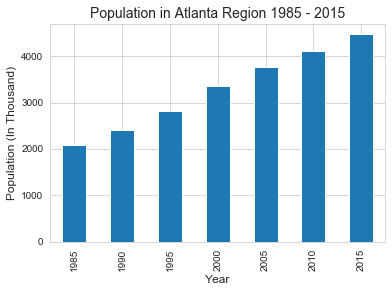

In [29]:
# Plot the total population was served by public water supply
domestic_pub.groupby('Year')['Pop_Pub_Serve'].sum().plot(kind='bar')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (In Thousand)', fontsize='12')
plt.title('Population in Atlanta Region 1985 - 2015', fontsize=14)
plt.show()

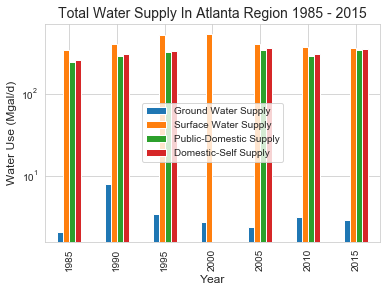

In [30]:
# Create figure and axis objects with subplots()
fig = plt.Figure(figsize=(10,8))
# make a plot
domestic_pub.groupby('Year')[['Pub_gwater_withdrawals (Mgal/d)','Pub_swater_withdrawals (Mgal/d)',
                             'Pub_deliver_domestic (Mgal/d)','Domestic_self_supp (Mgal/d)']].sum().plot(kind='bar',
                                                                                                       logy=True, legend = False)
plt.title('Total Water Supply In Atlanta Region 1985 - 2015', fontsize=14)                                                                                                       
plt.xlabel('Year', fontsize=12)
plt.ylabel('Water Use (Mgal/d)', fontsize=12)
plt.legend(['Ground Water Supply', 'Surface Water Supply', 'Public-Domestic Supply', 'Domestic-Self Supply'],
             loc='center')
plt.show()

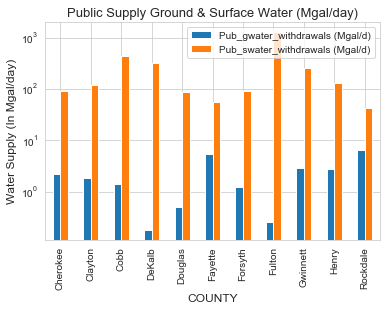

In [31]:
# Plot amount of ground water and surface water have been supplied by Atlanta Region Water System
domestic_pub.groupby('COUNTY')[['Pub_gwater_withdrawals (Mgal/d)','Pub_swater_withdrawals (Mgal/d)']].sum().plot(kind='bar', logy=True)
plt.title('Public Supply Ground & Surface Water (Mgal/day)', fontsize=13)
plt.ylabel('Water Supply (In Mgal/day)', fontsize=12)
plt.xlabel('COUNTY', fontsize=12)
plt.show()

##### Key takeaways
* Atlanta regional water supply systems supplied mostly surface-water (lakes, rivers, streams..) for its citizens
* Fulton is the county with highest use of surface-water compare to ground water, which is comprehensible. It's housing Atlanta City and city area with highest population in the region
* From the map location above, Fayette and Rockdale are rural counties, their use of ground water is almost 2/3 of surface-water

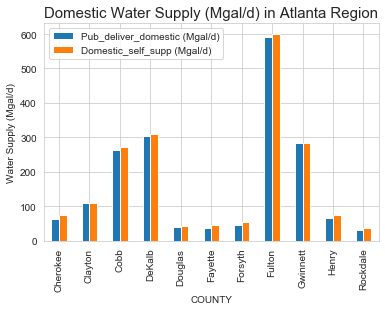

In [32]:
# Plot water supply provides to atlanta region
domestic_pub.groupby('COUNTY')[['Pub_deliver_domestic (Mgal/d)',
                                'Domestic_self_supp (Mgal/d)']].sum().plot(kind='bar')
plt.title('Domestic Water Supply (Mgal/d) in Atlanta Region', fontsize=15)
plt.ylabel('Water Supply (Mgal/d)')
plt.show()

##### Key takeaways
* Public water supplied and household self-supplied to households for each county almost identical in term of volumns! Can it be?
* Due to population and locations of each county,it's surprise that Fulton, Gwinnett, DeKalb, and Cobb are the highest water consumer.

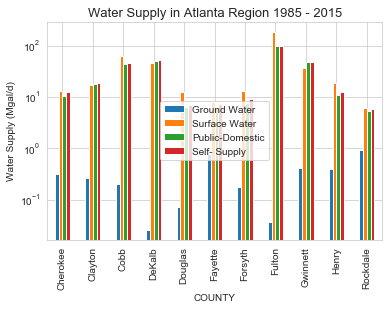

In [33]:
domestic_pub.groupby('COUNTY')[['Pub_gwater_withdrawals (Mgal/d)','Pub_swater_withdrawals (Mgal/d)',
                               'Pub_deliver_domestic (Mgal/d)','Domestic_self_supp (Mgal/d)']].mean().plot(kind='bar', logy=True,
                                                                                                         legend=True)
plt.title('Water Supply in Atlanta Region 1985 - 2015', fontsize=13)
plt.ylabel('Water Supply (Mgal/d)')
plt.legend(['Ground Water','Surface Water','Public-Domestic','Self- Supply'],
            loc='center')
plt.show()

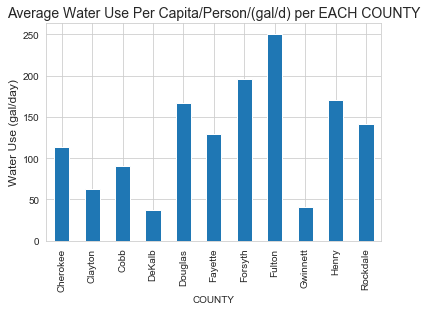

In [34]:
# Plot water per capita use per person/gal/day
domestic_pub.groupby('COUNTY')['Pub_capita_use_person (gal/day)'].mean().plot(kind='bar')
plt.title('Average Water Use Per Capita/Person/(gal/d) per EACH COUNTY', fontsize=14)
plt.ylabel('Water Use (gal/day)', fontsize=12)
plt.show()

##### Key takeaways
* Interesting findings! Clayton and DeKalb are the two most vulnerable counties in term of socio-economic vulnerability, but they are the least received public water supply.

In [35]:
# Create water supply to Atlanta Region in 2015
domestic_pub_15 = domestic_pub[domestic_pub.Year== 2015]
domestic_pub_15

COUNTY  Year  Pop_Pub_Serve  Pub_gwater_withdrawals (Mgal/d)  \
195  Cherokee  2015        218.523                             0.40   
216   Clayton  2015        270.075                             0.04   
230      Cobb  2015        650.254                             0.00   
307    DeKalb  2015        734.871                             0.00   
335   Douglas  2015        135.337                             0.04   
391   Fayette  2015         91.918                             0.73   
405   Forsyth  2015        200.277                             0.01   
419    Fulton  2015       1008.910                             0.16   
468  Gwinnett  2015        895.823                             0.64   
524     Henry  2015        189.206                             0.68   
853  Rockdale  2015         75.337                             0.22   

     Pub_swater_withdrawals (Mgal/d)  Pub_deliver_domestic (Mgal/d)  \
195                            18.89                          14.93   
216                            10.72                          20.59   
230                            42.22                          34.09   
307                             0.00                          43.11   
335                            17.48                           6.52   
391                             8.73                           7.00   
405                            20.60                          12.34   
419                           196.16                         122.61   
468                             0.00                          51.20   
524                            33.45                          24.67   
853                            11.54                           5.42   

     Pub_capita_use_person (gal/day)  Domestic_self_supp (Mgal/d)  \
195                             88.0                        15.41   
216                             40.0                        20.88   
230                             65.0                        35.88   
307                              0.0                        43.11   
335                            129.0                         6.67   
391                            103.0                         8.41   
405                            103.0                        12.67   
419                            195.0                       122.66   
468                              1.0                        51.20   
524                            180.0                        26.81   
853                            156.0                         6.43   

     Total Water Use  
195              NaN  
216              NaN  
230              NaN  
307              NaN  
335              NaN  
391              NaN  
405              NaN  
419              NaN  
468              NaN  
524              NaN  
853              NaN

In [36]:
# Create the basic figure
fig = go.Figure()
# Add a trace per metric
fig.add_trace(go.Bar(x=domestic_pub_15["COUNTY"], y=domestic_pub_15["Pub_gwater_withdrawals (Mgal/d)"], name="Ground water (Mgal/d)"))
fig.add_trace(go.Bar(x=domestic_pub_15["COUNTY"], y=domestic_pub_15["Pub_swater_withdrawals (Mgal/d)"], name="Surface_water (Mgal/d)"))
fig.add_trace(go.Bar(x=domestic_pub_15["COUNTY"], y=domestic_pub_15["Pub_deliver_domestic (Mgal/d)"], name="Public-Domestic (Mgal/d)"))
fig.add_trace(go.Bar(x=domestic_pub_15["COUNTY"], y=domestic_pub_15["Domestic_self_supp (Mgal/d)"], name="Self-Supplied (Mgal/d)"))
fig.update_layout(title={'text':'2015 Water Supply to Atlanta Region (Mgal/d)',
                        'y':0.9,'x': 0.5,'xanchor':'right','yanchor':'top'})
fig.show()

##### Keys takeaways
* Ground Water didn't show up because the data values are relative very small (ratio: 1/20000) compare to other columns values, normalize data wouldn't reflect its true values
* DeKalb and Gwinnett County doesn't have 2015 data for ground and surface water
* Fulton received high water volumns due to its population, Capital City, and its geographical location
* There are no ground water data for both Cobb and DeKalb County
* Cherokee, Fayette, Henry, and Gwinnett County are the most using ground water. These are rural areas, it could be used for household or for plantation purposes

In [37]:
# Create the basic figure
fig = go.Figure()
# Add a trace per metric
fig.add_trace(go.Bar(x=domestic_pub_15["COUNTY"], y=domestic_pub_15["Pub_capita_use_person (gal/day)"], 
                     name="Use Per Capita/Person/(gal/d)"))
fig.add_trace(go.Scatter(x=domestic_pub_15["COUNTY"], y=domestic_pub_15["Pop_Pub_Serve"],
                         mode="lines+markers", name= "Population (Thousands)"))
fig.update_layout(title={'text':' 2015 Population vs. Water Use Per Capita',
                      'y':0.9,'x': 0.5,'xanchor':'center','yanchor':'top'})
fig.update_layout(legend=dict(yanchor="top",y=0.99,xanchor="left", x=0.01))
fig.show()

##### Key takeaways
* Clayton, DeKalb, and Gwinnett have a very low number of water use per capita/person/gal/day.
* These counties also have high vulnerability index in term of socioeconomic status.

In [111]:
# Let's combine the two datasets for further analysis
atl_reg_svi_water = atl_reg_svi.merge(domestic_pub, on='COUNTY')
# subset year where year = 2015
atl_reg_svi_water_2015 = atl_reg_svi_water[atl_reg_svi_water['Year'] == 2015]
# examine the first 2 rows                                                                        
atl_reg_svi_water_2015.head(2)

ST    STATE ST_ABBR    COUNTY   FIPS                  LOCATION  \
6   13  GEORGIA      GA  Cherokee  13057  Cherokee County, Georgia   
13  13  GEORGIA      GA   Fayette  13113   Fayette County, Georgia   

     AREA_SQMI  E_TOTPOP  M_TOTPOP     E_HU  ...  E_DAYPOP  \
6   421.109584  230629.0       0.0  85926.0  ...  178484.0   
13  194.363402  109495.0       0.0  41391.0  ...   99027.0   

                                             geometry  Year  Pop_Pub_Serve  \
6   POLYGON ((-84.65883 34.09571, -84.65853 34.109...  2015        218.523   
13  POLYGON ((-84.62722 33.44008, -84.62572 33.443...  2015         91.918   

    Pub_gwater_withdrawals (Mgal/d)  Pub_swater_withdrawals (Mgal/d)  \
6                              0.40                            18.89   
13                             0.73                             8.73   

    Pub_deliver_domestic (Mgal/d)  Pub_capita_use_person (gal/day)  \
6                           14.93                             88.0   
13                           7.00                            103.0   

    Domestic_self_supp (Mgal/d)  Total Water Use  
6                         15.41              NaN  
13                         8.41              NaN  

[2 rows x 132 columns]

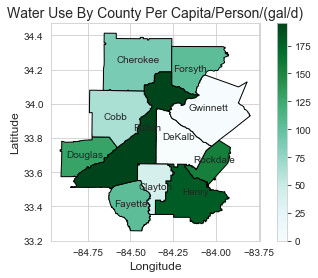

In [112]:
import warnings
warnings.filterwarnings('ignore')
# Plot Water use per capita
atl_reg_svi_water_2015.plot(column = 'Pub_capita_use_person (gal/day)',
                            cmap='BuGn',edgecolor='black',legend = True)
# Annotate county's names on the map 
atl_reg_svi_water_2015['coords'] = atl_reg_svi_water_2015['geometry'].apply(lambda x: x.representative_point().coords[:])
atl_reg_svi_water_2015['coords'] = [coords[0] for coords in atl_reg_svi_water_2015['coords']]
for ind, row in atl_reg_svi_water_2015.iterrows():
    plt.annotate(s=row['COUNTY'],xy=row['coords'],
                horizontalalignment='center')

# label x, y axis and title
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Water Use By County Per Capita/Person/(gal/d)', fontsize=14)
plt.show()

##### III.  Water Quality Dataset
* This dataset isn't above water quality and the components that comprise a good quality water for human consumption.  
* It's about:
   * the locations of the ground water (wells) in GA.
        * the monitoring location identifiers
        * Aquifers
        * Construction sites
        * Well measurements with respect to the sea levels and landsite surfaces
   * We need more relevant datasets in order to analyze water quality
    
* References:
1.  https://www.waterqualitydata.us/portal_userguide/
2. https://www.waterqualitydata.us/portal/#statecode=US%3A13&characteristicType=PFAS%2CPerfluorinated%20Alkyl%20Substance&characteristicType=PFOA%2C%20Perfluorooctanoic%20Acid&mimeType=csv
3. https://www.wcio.org/Active%20SCL/StateCodeListJune2008.pdf 
* GA state code:10, FIPS State Code for GA: 13?

In [57]:
import pandas as pd
water_q = pd.read_csv('pfas_pfoa_water_quality.csv')
water_q.head(2)

OrganizationIdentifier             OrganizationFormalName  \
0                USGS-GA  USGS Georgia Water Science Center   
1                USGS-GA  USGS Georgia Water Science Center   

  MonitoringLocationIdentifier                         MonitoringLocationName  \
0                USGS-02183650  SHOAL CREEK AT SHOAL CREEK RD, NR LAVONIA, GA   
1                USGS-02187660        COLDWATER CREEK (CR 60) NEAR NUBERG, GA   

  MonitoringLocationTypeName MonitoringLocationDescriptionText  \
0                     Stream                               NaN   
1                     Stream                               NaN   

   HUCEightDigitCode  DrainageAreaMeasure/MeasureValue  \
0          3060102.0                               NaN   
1          3060103.0                              12.6   

  DrainageAreaMeasure/MeasureUnitCode  \
0                                 NaN   
1                               sq mi   

   ContributingDrainageAreaMeasure/MeasureValue  ... CountyCode  AquiferName  \
0                                           NaN  ...        147          NaN   
1                                          12.6  ...        147          NaN   

   FormationTypeText  AquiferTypeName ConstructionDateText  \
0                NaN              NaN                  NaN   
1                NaN              NaN                  NaN   

  WellDepthMeasure/MeasureValue WellDepthMeasure/MeasureUnitCode  \
0                           NaN                              NaN   
1                           NaN                              NaN   

  WellHoleDepthMeasure/MeasureValue  WellHoleDepthMeasure/MeasureUnitCode  \
0                               NaN                                   NaN   
1                               NaN                                   NaN   

  ProviderName  
0         NWIS  
1         NWIS  

[2 rows x 36 columns]

In [42]:
# View columns and its position in the dataset
mapping= {c[0]:c[1] for c in enumerate(water_q.columns)}
print(mapping)

{0: 'OrganizationIdentifier', 1: 'OrganizationFormalName', 2: 'MonitoringLocationIdentifier', 3: 'MonitoringLocationName', 4: 'MonitoringLocationTypeName', 5: 'MonitoringLocationDescriptionText', 6: 'HUCEightDigitCode', 7: 'DrainageAreaMeasure/MeasureValue', 8: 'DrainageAreaMeasure/MeasureUnitCode', 9: 'ContributingDrainageAreaMeasure/MeasureValue', 10: 'ContributingDrainageAreaMeasure/MeasureUnitCode', 11: 'LatitudeMeasure', 12: 'LongitudeMeasure', 13: 'SourceMapScaleNumeric', 14: 'HorizontalAccuracyMeasure/MeasureValue', 15: 'HorizontalAccuracyMeasure/MeasureUnitCode', 16: 'HorizontalCollectionMethodName', 17: 'HorizontalCoordinateReferenceSystemDatumName', 18: 'VerticalMeasure/MeasureValue', 19: 'VerticalMeasure/MeasureUnitCode', 20: 'VerticalAccuracyMeasure/MeasureValue', 21: 'VerticalAccuracyMeasure/MeasureUnitCode', 22: 'VerticalCollectionMethodName', 23: 'VerticalCoordinateReferenceSystemDatumName', 24: 'CountryCode', 25: 'StateCode', 26: 'CountyCode', 27: 'AquiferName', 28: 'Fo

In [58]:
# subset dataframe with the county codes of regional atlanta
county_code = ['057', '063','067', '089', '097','113', '117', '121', '135', '151', '247']
# county: Cherokee,Clayton,Cobb,DeKalb,Douglas,Fayette,Forsyth,Fullton,Gwinnett, Henry,Rockdale
atl_water = water_q[water_q.CountyCode.isin(county_code)]
atl_water.shape

(412, 36)

In [59]:
atl_water.head(2)

OrganizationIdentifier             OrganizationFormalName  \
36                USGS-GA  USGS Georgia Water Science Center   
37                USGS-GA  USGS Georgia Water Science Center   

   MonitoringLocationIdentifier  \
36                USGS-02203603   
37                USGS-02203620   

                            MonitoringLocationName MonitoringLocationTypeName  \
36  SOUTH RIVER AT SPRINGDALE ROAD, AT ATLANTA, GA                     Stream   
37  SOUTH RIVER AT MACON DRIVE, NEAR HAPEVILLE, GA                     Stream   

   MonitoringLocationDescriptionText  HUCEightDigitCode  \
36                               NaN          3070103.0   
37                               NaN          3070103.0   

    DrainageAreaMeasure/MeasureValue DrainageAreaMeasure/MeasureUnitCode  \
36                              2.42                               sq mi   
37                              4.80                               sq mi   

    ContributingDrainageAreaMeasure/MeasureValue  ... CountyCode  AquiferName  \
36                                           NaN  ...        121          NaN   
37                                           NaN  ...        121          NaN   

    FormationTypeText  AquiferTypeName ConstructionDateText  \
36                NaN              NaN                  NaN   
37                NaN              NaN                  NaN   

   WellDepthMeasure/MeasureValue WellDepthMeasure/MeasureUnitCode  \
36                           NaN                              NaN   
37                           NaN                              NaN   

   WellHoleDepthMeasure/MeasureValue  WellHoleDepthMeasure/MeasureUnitCode  \
36                               NaN                                   NaN   
37                               NaN                                   NaN   

   ProviderName  
36         NWIS  
37         NWIS  

[2 rows x 36 columns]

In [60]:
len(atl_water['WellHoleDepthMeasure/MeasureValue'])

412

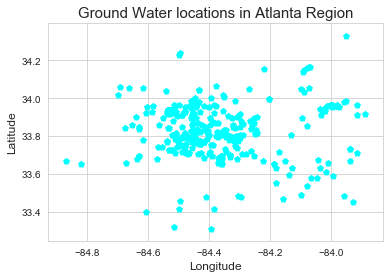

In [46]:
# identify ground water locations in Atlanta Region based on spatial geometry
plt.scatter(atl_water.LongitudeMeasure, atl_water.LatitudeMeasure, c='cyan', marker='p')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Ground Water locations in Atlanta Region', fontsize=15)
plt.show()

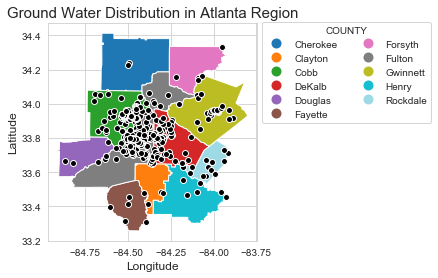

In [61]:
# Plot Ground Water (Wells) distribution in Atlanta Counties
# Set legend style
lgnd_kwds = {'title': 'COUNTY',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 2}

# Plot Atlanta Region using the tab20 colormap (qualitative)
atl_reg_svi.plot(column = 'COUNTY', cmap = 'tab20',legend = True, legend_kwds = lgnd_kwds)
# Add the ground water locations
plt.scatter(atl_water.LongitudeMeasure, atl_water.LatitudeMeasure, c='black', edgecolor='white')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Ground Water Distribution in Atlanta Region', fontsize=15)
plt.show()

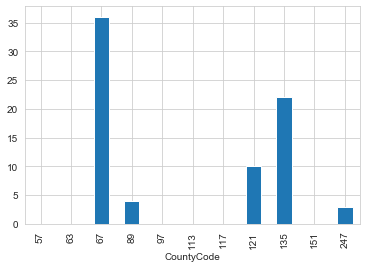

In [62]:
# View the number of wells in Atlanta Region
atl_water.groupby('CountyCode')['WellHoleDepthMeasure/MeasureValue'].count().plot(kind='bar')
plt.show()

##### IV. Water contanmination  dataset

In [93]:
# Load the file
df = pd.read_excel('GA_water.xlsx')
df.head(2)

PWSID         PWSName Size  FacilityID         FacilityName  \
0  GA0090000  Baldwin County    L       10186  Distribution System   
1  GA0090000  Baldwin County    L       10186  Distribution System   

  FacilityWaterType SamplePointID         SamplePointName SamplePointType  \
0                SW           501  960 Carrs Station Road              DS   
1                SW           501  960 Carrs Station Road              DS   

  CollectionDate  ... Contaminant MRL   MethodID AnalyticalResultsSign  \
0     2019-02-05  ...        HAA9 NaN  EPA 552.3                     =   
1     2019-02-05  ...        HAA5 NaN  EPA 552.3                     =   

  AnalyticalResultValue(µg/L)  SampleEventCode MonitoringRequirement Region  \
0                      47.670             SEH1                    AM      4   
1                      39.736             SEH1                    AM      4   

   State  Zipcode  
0     GA  31061.0  
1     GA  31061.0  

[2 rows x 21 columns]

In [90]:
df.Zipcode.value_counts()

30707.0    545
30751.0    536
30549.0    528
30184.0    506
30248.0    480
          ... 
30643.0     24
30295.0     24
30513.0     24
30525.0     23
31326.0     23
Name: Zipcode, Length: 124, dtype: int64

In [72]:
# View the first 10 facilities with contaminants
df_ga.PWSName.unique()

array(['Baldwin County', 'Milledgeville', 'Banks Co. - Mountain Creek',
       'Winder', 'Barrow County Water', 'Bartow County', 'Cartersville',
       'Fitzgerald', 'Macon Water Authority', 'Richmond Hill',
       'Statesboro', 'Butts County - Jackson/Jenkinsburg', 'Kingsland',
       "St. Mary's", 'Carroll County', 'Carrollton', 'Villa Rica',
       'Catoosa Util. District Authority', 'Pooler', 'Savannah - Main',
       'Savannah - I & D', 'The Landings Subdivision',
       'Larchmont Utilities', 'Savannah - Georgetown/Gateway',
       'Savannah - Wilmington Island', 'Savannah - Savannah Quarters',
       'Summerville', 'Canton', 'Cherokee County', 'Woodstock',
       'Athens-Clarke Co. Water', 'Clay County Water',
       'Clayton County Water Authority', 'Austell', 'Cobb County',
       'Marietta', 'Smyrna', 'Douglas', 'Moultrie', 'Columbia County',
       'Grovetown', 'Newnan', 'Coweta Water & Sewer Auth.', 'Cordele',
       'Dade County Water Authority', 'Etowah', 'Bainbridge',
  

In [66]:
facility = ['Cherokee County','Clayton County Water Authority',
            'Cobb County','Douglasville-Douglas County WSA','DeKalb County',
            'Fayette County','Forsyth Co. Water & Sewer',
            'North Fulton County',
            'Gwinnett Co. Dept. of Water Resources',
            'Henry County Water & Sewer Authority',
            'Rockdale Co. Water']
atl_reg_pws = df_ga[df_ga.PWSName.isin(facility)]
atl_reg_pws.head()

PWSID          PWSName Size  FacilityID  \
4585  GA0570002  Cherokee County    L         530   
4586  GA0570002  Cherokee County    L         530   
4587  GA0570002  Cherokee County    L         530   
4588  GA0570002  Cherokee County    L         530   
4589  GA0570002  Cherokee County    L         530   

                     FacilityName FacilityWaterType SamplePointID  \
4585  Cherokee County Water Plant                SW           301   
4586  Cherokee County Water Plant                SW           301   
4587  Cherokee County Water Plant                SW           301   
4588  Cherokee County Water Plant                SW           301   
4589  Cherokee County Water Plant                SW           301   

         SamplePointName SamplePointType CollectionDate  ...  \
4585  Finished Water Tap              EP     2019-05-06  ...   
4586  Finished Water Tap              EP     2019-05-06  ...   
4587  Finished Water Tap              EP     2019-05-06  ...   
4588  Finished Water Tap              EP     2019-05-06  ...   
4589  Finished Water Tap              EP     2019-05-06  ...   

           Contaminant  MRL   MethodID AnalyticalResultsSign  \
4585         1-butanol  2.0    EPA 541                     <   
4586  2-methoxyethanol  0.4    EPA 541                     <   
4587         germanium  0.3  EPA 200.8                     <   
4588         manganese  0.4  EPA 200.8                     <   
4589     2-propen-1-ol  0.5    EPA 541                     <   

     AnalyticalResultValue(µg/L)  SampleEventCode MonitoringRequirement  \
4585                         NaN             SEA1                    AM   
4586                         NaN             SEA1                    AM   
4587                         NaN             SEA1                    AM   
4588                         NaN             SEA1                    AM   
4589                         NaN             SEA1                    AM   

     Region  State  Zipcode  
4585      4     GA  30169.0  
4586      4     GA  30169.0  
4587      4     GA  30169.0  
4588      4     GA  30169.0  
4589      4     GA  30169.0  

[5 rows x 21 columns]

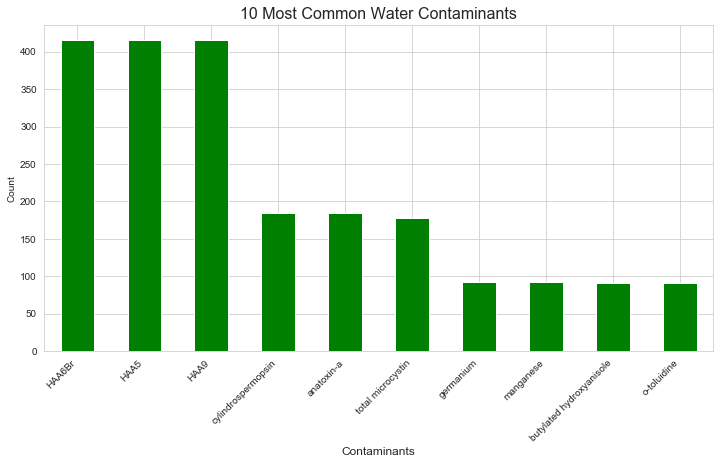

In [67]:
# Plot the 10 most contaminants
plt.figure(figsize=(12,6))
chart = atl_reg_pws.Contaminant.value_counts()[:10].plot(kind='bar', color='g')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('10 Most Common Water Contaminants', fontsize=16)
plt.xlabel('Contaminants', fontsize=12)
plt.ylabel('Count')
plt.show()

In [68]:
atl_reg_pws.Contaminant.value_counts()[:10]

HAA6Br                      415
HAA5                        415
HAA9                        415
cylindrospermopsin          184
anatoxin-a                  184
total microcystin           178
germanium                    92
manganese                    92
butylated hydroxyanisole     91
o-toluidine                  91
Name: Contaminant, dtype: int64

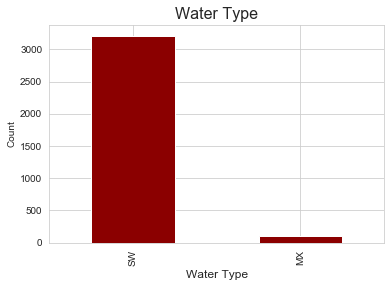

In [69]:
# Plot number of water type
atl_reg_pws.FacilityWaterType.value_counts().plot(kind='bar', color='darkred')
plt.title('Water Type', fontsize=16)
plt.xlabel('Water Type', fontsize=12)
plt.ylabel('Count')
plt.show()

In [116]:
# Create the basic figure
fig = go.Figure()
# Create a list of contaminants
contaminants = ['HAA5','HAA9','HAA6BR','cylindrospermopsin','anatoxin-a','total microcystin','manganese']#,
                #'germanium']#'butylated hydroxyanisole','o-toluidine']
# Loop through it
for contaminant in contaminants:
    df_contaminant = atl_reg_pws[atl_reg_pws.Contaminant == contaminant]
    # Add a trace for each contaminant
    fig.add_trace(go.Bar(x=df_contaminant['PWSName'],
                         y=df_contaminant['Contaminant'],
                         name = contaminant))    
#Create the buttons
dropdown_buttons = [
{'label': "ALL", 'method': "update", 'args': [{"visible":[True,True,True,True,True,True,True,True,True,True,True]}, {"title": "ALL "}]},
{'label':'HAA5','method': "update", 'args': [{"visible":[False,True,False,False,False,False,False,False,False,False,False]}, {"title": "HAA5"}]},
{'label': "HAA9", 'method': "update", 'args': [{"visible":[False,False,True,False,False,False,False,False,False,False,False]}, {"title": "HAA9"}]},
{'label': "HAA6Br", 'method': "update", 'args': [{"visible":[False,False,False,True,False,False,False,False,False,False,False]}, {"title": "HAA6Br"}]},
{'label': "cylindrospermopsin", 'method': "update", 'args': [{"visible":[False,False,False,False,True,False,False,False,False,False,False]}, {"title": "cylindrospermopsin"}]},
{'label': "anatoxin-a", 'method': "update", 'args': [{"visible":[False,False,False,False,False,True,False,False,False,False,False]}, {"title": "anatoxin-a"}]},
{'label': "total microcystin", 'method': "update", 'args': [{"visible":[False,False,False,False,False,False,True,False,False,False,False]}, {"title": "total microcystin"}]},
{'label': "manganese", 'method': "update", 'args': [{"visible":[False,False,False,False,False,False,False,True,False,False,False]},]}
]#{"title": "manganese"}
#Update the figure to add dropdown menu
fig.update_layout({
       'updatemenus': [
       {'active': 0, 'buttons': dropdown_buttons}
       ]})
fig.update_layout(title={'text':'Most Common Water Contaminants',
                        'y':0.9,'x': 0.5,'xanchor':'center','yanchor':'top'})
# Show the plot
fig.show()